In [5]:
%load_ext autoreload
%autoreload 2
from sklearn import datasets
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, f1_score, precision_recall_curve
import matplotlib.pyplot as plt


from final_project import plots


# from final_project.roc import hello

# hello()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<class 'numpy.ndarray'>


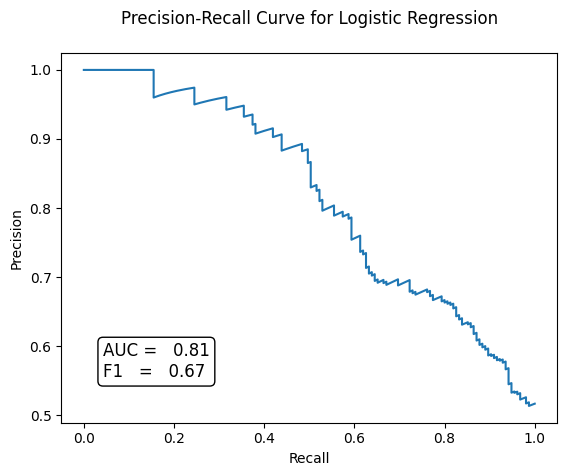

In [8]:
x, y = datasets.make_classification(n_samples=1000, n_features=10, n_informative=3, n_classes=2, n_redundant=1, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model = LogisticRegression()
model.fit(x_train, y_train)





y_prob = model.predict_proba(x_test)[:, 1] # return labels and probablility of being in a group
print(type(y_prob))
# print(y_score) # returns a simple array of the probabilities

# precision
# recall
# y_test
# y_prob
# y_pred

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
auc_score = auc(recall, precision)
y_pred = (y_prob >= 0.5).astype(int)
f1 = f1_score(y_test, y_pred)

# , label=f"AUC={auc_score:.2f}\nF1={f1:.2f}")
# fig, ax = plt.subplots()
# ax.plot(recall, precision)
# ax.set_xlabel('Recall')
# ax.set_ylabel('Precision')
# ax.set_title('Precision-Recall Curve\n')
# ax.annotate(f"AUC ={auc_score:>7.2f}\nF1   ={f1:>7.2f}", xy=(30, 30), xycoords='axes points', size=12, ha='left', va='bottom', bbox=dict(boxstyle='round', fc='w'))
plots.save_precision_recall_curve("Logistic Regression", "lr_pr_curve", y_test, y_prob)
plt.show()

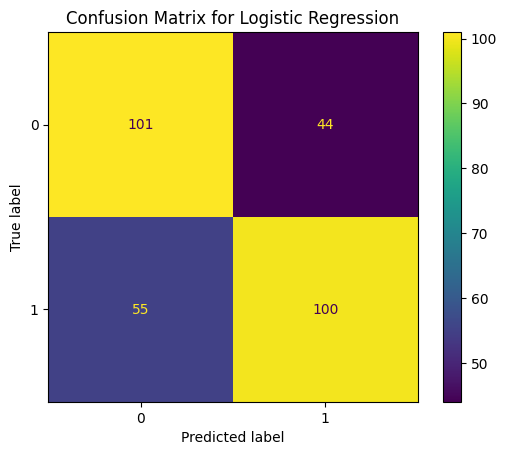

In [4]:

# conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
# fig, ax = plt.subplots(figsize=(7.5, 7.5))
# ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
# for i in range(conf_matrix.shape[0]):
#     for j in range(conf_matrix.shape[1]):
#         ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
# plt.xlabel('Predictions', fontsize=18)
# plt.ylabel('Actuals', fontsize=18)
# plt.title('Confusion Matrix', fontsize=18)
# # plt.show()

# ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plots.save_confusion_matrix("Logistic Regression", "lr_confusion_matrix", y_test, y_pred)
plt.show()

